##### Audio Loopback

##### Date: 27/11/2023

#### AIM: 
Write a program to generate delay in the audio input.

#### THEORY:
In the loopback experiment, we simply connected the input to the output. Typically, we will do some processing on the input sample and then output the processed sample. Some simple, yet striking, effects can be achieved simply by delaying the samples as they pass from input to output. Program delay.c, listed below, demonstrates this. A delay line is implemented using the array buffer to store samples as they are read from the codec. Once the array is full, the program overwrites the oldest stored input sample with the current, or newest, input sample. Just prior to overwriting the oldest stored input sample in buffer , that sample is retrieved, added to the current input sample, and output to the codec. Figure below shows a block diagram representation of the operation of program delay.c in which the block labeled T represents a delay of T seconds. Note that the sampling rate is set to 8 kHz, therefore, the delay of 8000 samples corresponds to a delay of 1 sec. Build and run the project, using line-in and headphones to verify its operation.

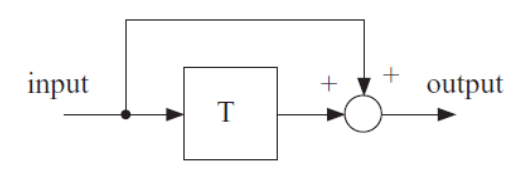

##### CODE:
```
#include <dsk6713.h>
#include <dsk6713_aic23.h>
#define BUF_SIZE 8000
void main()
{

    		Uint32 sample_pair; // both channels packed in 32-bits
    		short i = 0, left, buffer[BUF_SIZE] = { 0 }, delayed, output;
    		DSK6713_init();
    		DSK6713_AIC23_Config config = DSK6713_AIC23_DEFAULTCONFIG;
    		DSK6713_AIC23_CodecHandle hCodec;
    		hCodec = DSK6713_AIC23_openCodec(0, &config);
    		DSK6713_AIC23_setFreq(hCodec, DSK6713_AIC23_FREQ_8KHZ);
    		while (1)
    		{
        		while (!DSK6713_AIC23_read(hCodec, &sample_pair));
        	//extract left sample and put in 16-bits
left = (int)sample_pair >> 16; // 
        		delayed = buffer[i]; //read oldest sample
        		output = left + delayed; //output sum of new and delayed
        		buffer[i] = left; //replace oldest sample with input 
        		
//increment i to point to the oldest sample
if (++i >= BUF_SIZE) 
            			i = 0;
        		
//put 16-bit sample in top-half
sample_pair = (int)output << 16; 
        		
while (!DSK6713_AIC23_write(hCodec, sample_pair));

    		}
    	}

```

##### Procedure: 
Delay: In the loopback experiment, we simply connected the input to the output. Typically, we will do some processing on the input sample and then output the processed sample. Some simple, yet striking, effects can be achieved simply by delaying the samples as they pass from input to output. Program delay.c, listed below, demonstrates this. A delay line is implemented using the array buffer to store samples as they are read from the codec. Once the array is full, the program overwrites the oldest stored input sample with the current, or newest, input sample. Just prior to overwriting the oldest stored input sample in buffer , that sample is retrieved, added to the current input sample, and output to the codec. Figure below shows a block diagram representation of the operation of program delay.c in which the block labeled T represents a delay of T seconds. Note that the sampling rate is set to 8kHz, therefore, the delay of 8000 samples corresponds to a delay of 1 sec. Build and run the project, using line-in and headphones to verify its operation.

##### Result:
Successfully implemented and tested delay
